In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
df = pd.read_csv(r'C:\Users\user\Downloads\C2_train.gender_submission.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [4]:
x = df.drop('Sex',axis=1)
y=df['Sex']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df1 = df[['PassengerId','Pclass','Age','SibSp', 'Parch','Fare','Sex']]
df1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex
0,1,3,22.0,1,0,7.2500,male
1,2,1,38.0,1,0,71.2833,female
2,3,3,26.0,0,0,7.9250,female
3,4,1,35.0,1,0,53.1000,female
4,5,3,35.0,0,0,8.0500,male
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,male
887,888,1,19.0,0,0,30.0000,female
888,889,3,NaN,1,2,23.4500,female
889,890,1,26.0,0,0,30.0000,male


In [8]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex          891 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [9]:
df2 = df1.fillna(0)

In [10]:
x = df2[['PassengerId','Pclass','Age','SibSp', 'Parch','Fare']]
y = df2['Sex']

In [11]:
g1 = {"Sex":{'Male':1,'Female':2}}
df2= df2.replace(g1)
print(df2)

     PassengerId  Pclass   Age  SibSp  Parch     Fare     Sex
0              1       3  22.0      1      0   7.2500    male
1              2       1  38.0      1      0  71.2833  female
2              3       3  26.0      0      0   7.9250  female
3              4       1  35.0      1      0  53.1000  female
4              5       3  35.0      0      0   8.0500    male
..           ...     ...   ...    ...    ...      ...     ...
886          887       2  27.0      0      0  13.0000    male
887          888       1  19.0      0      0  30.0000  female
888          889       3   0.0      1      2  23.4500  female
889          890       1  26.0      0      0  30.0000    male
890          891       3  32.0      0      0   7.7500    male

[891 rows x 7 columns]


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
y_train.shape

(623,)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
parameters = {
    'max_depth':[13,24,53,64,25],
    'min_samples_leaf':[35,16,75,70,45],
    'n_estimators':[10,20,30,40,50]
}

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_search = GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 24, 53, 64, 25],
                         'min_samples_leaf': [35, 16, 75, 70, 45],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [20]:
grid_search.best_score_

0.6693616538873773

In [21]:
from sklearn.tree import plot_tree

In [22]:
rfc_best= grid_search.best_estimator_

[Text(2394.75, 3080.4, 'SibSp <= 0.5\ngini = 0.457\nsamples = 415\nvalue = [220, 403]\nclass = No'),
 Text(1162.5, 2718.0, 'Pclass <= 1.5\ngini = 0.412\nsamples = 289\nvalue = [126, 309]\nclass = No'),
 Text(558.0, 2355.6, 'Fare <= 52.5\ngini = 0.483\nsamples = 64\nvalue = [37, 54]\nclass = No'),
 Text(372.0, 1993.2, 'PassengerId <= 578.5\ngini = 0.215\nsamples = 36\nvalue = [6, 43]\nclass = No'),
 Text(186.0, 1630.8, 'gini = 0.067\nsamples = 20\nvalue = [1, 28]\nclass = No'),
 Text(558.0, 1630.8, 'gini = 0.375\nsamples = 16\nvalue = [5, 15]\nclass = No'),
 Text(744.0, 1993.2, 'gini = 0.387\nsamples = 28\nvalue = [31, 11]\nclass = Yes'),
 Text(1767.0, 2355.6, 'Parch <= 0.5\ngini = 0.384\nsamples = 225\nvalue = [89, 255]\nclass = No'),
 Text(1581.0, 1993.2, 'PassengerId <= 656.0\ngini = 0.324\nsamples = 207\nvalue = [64, 251]\nclass = No'),
 Text(930.0, 1630.8, 'Fare <= 7.523\ngini = 0.383\nsamples = 143\nvalue = [55, 158]\nclass = No'),
 Text(744.0, 1268.4, 'gini = 0.102\nsamples = 27\

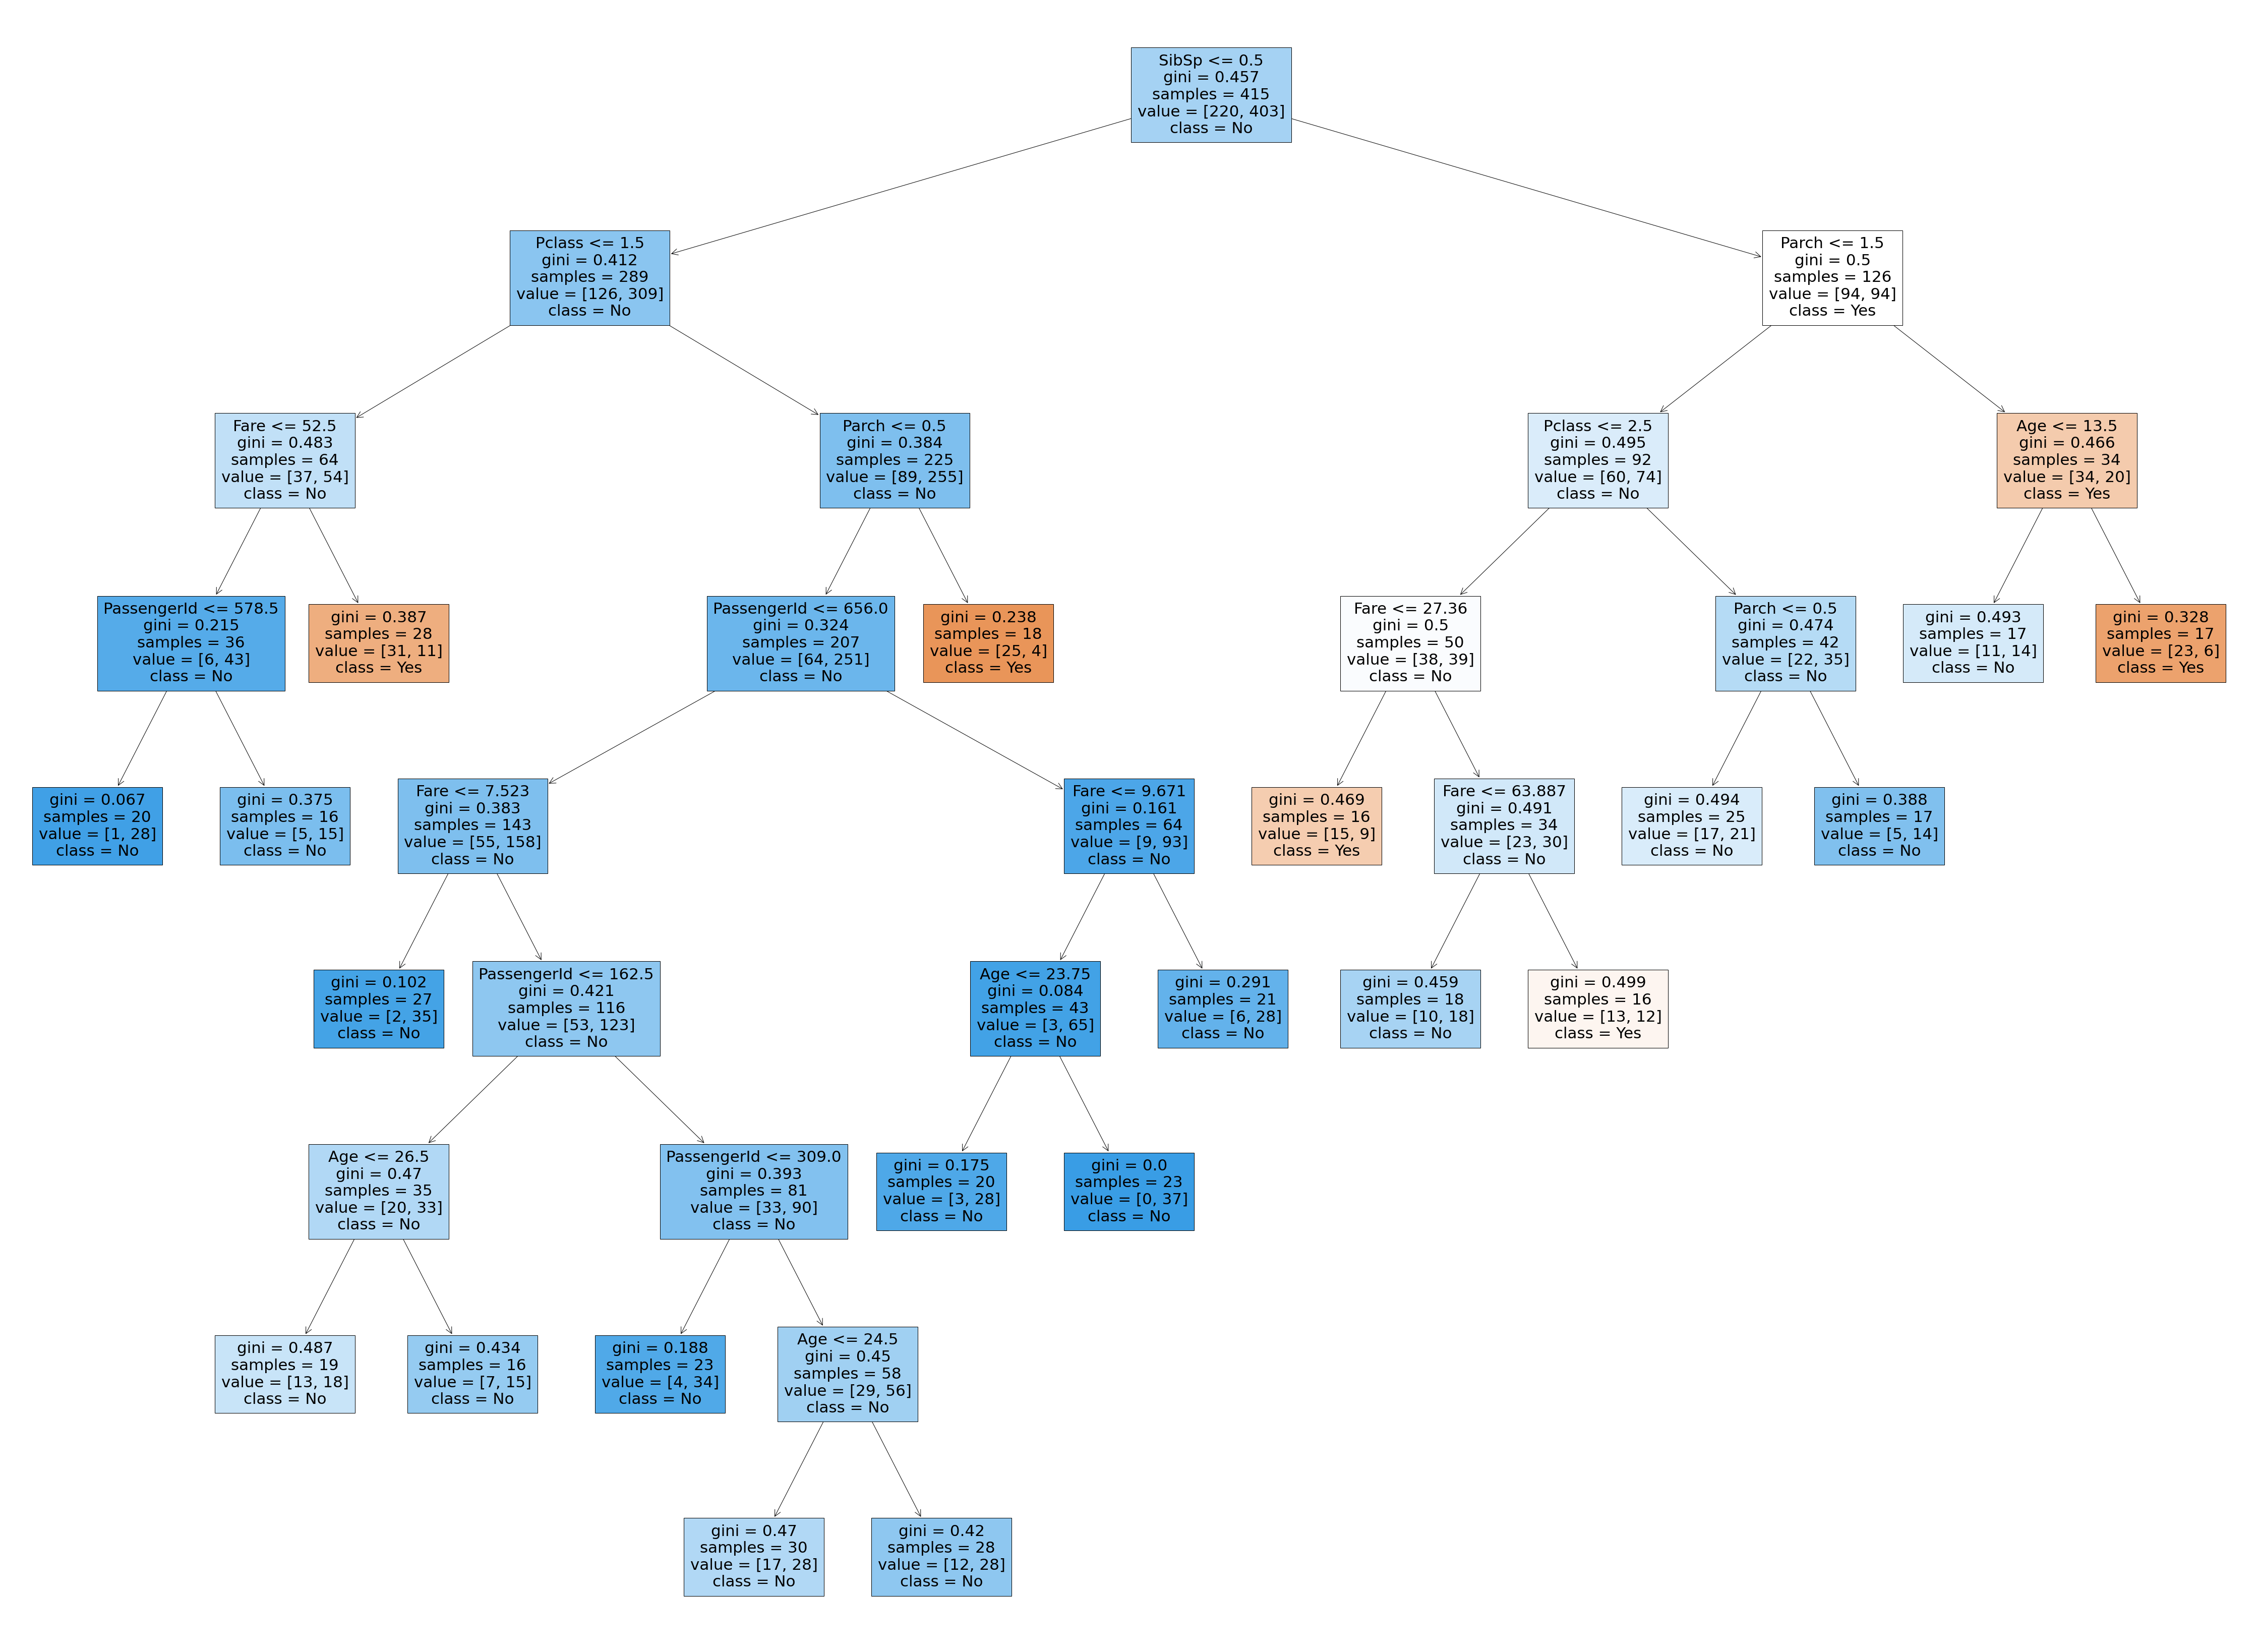

In [23]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=["Yes","No"],filled=True)